# Analysis of French first names between 1900 and 2015

USING INSEE FILES AVAILABLE AT: https://www.insee.fr/fr/statistiques/2540004#consulter

## Content:

0. Import and prepare the dataset
1. Most common names in 2015 and overall between 1900 and 2015
2. Evolution of some specific names throughout the years
3. Evolution of the number of names
4. Name trends
5. Evolution of the length of names

## 0. Import and prepare the dataset

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Import the dataset

In [2]:
df = pd.read_csv('nat2015.txt', sep = '\t', encoding = 'latin1')
print(df.head())

# Alternatively, can use Excel to convert the txt file into csv format 
# use the tab delimiter and 1252: Western European (Windows) (to properly display the French characters (é, ï, etc.)).

   sexe preusuel annais  nombre
0     1        A   1980     3.0
1     1        A   1998     3.0
2     1        A   XXXX    21.0
3     1    AADEL   1976     5.0
4     1    AADEL   1978     3.0


### Presentation of the features

The file contains four features:
- 'sexe': 1 for male, 2 for female
- 'preusuel': first name
- 'annais': year of birth, between 1900 and 2015
- 'nombre': number of people that year with that first name

INSEE used the following criteria to include a name or not:
1. Between 1900 and 1945, the name has been given at least 20 times to females and/or at least 20 times to males.
2. Between 1946 and 2015, the name has been given at least 20 times to females and/or at least 20 times to males.
3. For a given year, the name has been given at least 3 times to females or males.

Names that do not comply with conditions 1 and 2 are grouped by sex and year of birth under one entry with the value 'PRENOMS_RARES' (rare names) in the 'preusuel' column.

Names that comply with condition 2 but not condition 3 are grouped by sex and name under one entry with the value 'XXXX' in the 'annais' column.

### Rename columns

In [3]:
df.columns = ['sex', 'name', 'year', 'number']
print(df.head())

   sex   name  year  number
0    1      A  1980     3.0
1    1      A  1998     3.0
2    1      A  XXXX    21.0
3    1  AADEL  1976     5.0
4    1  AADEL  1978     3.0


### Example with the first name 'A'

In [4]:
dfA = df[(df.name) == 'A']
print(dfA)

   sex name  year  number
0    1    A  1980     3.0
1    1    A  1998     3.0
2    1    A  XXXX    21.0


- The first name 'A' was given 3 times to males in 1980.
- The first name 'A' was given 3 times to males in 1998.
- The first name 'A' was given 21 times between 1946 and 2015 but never more than 3 times for a given year except in 1980 and 1998.

### General characteristics of the dataset

There are 589,411 entries (rows) in the dataset, corresponding to almost 83 million people, and over 31,000 names.

The gender ('sex') and number of people ('number') are considered integers.

The names ('name') and year ('year') are considered objects (strings). Years are considered strings because they include 'XXXX' values.

In [5]:
df.info(memory_usage="deep")

# Alternative way to get info:
# print(len(df.index), df.sex.dtype, df.name.dtype, df.year.dtype, df.number.dtype)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589411 entries, 0 to 589410
Data columns (total 4 columns):
sex       589411 non-null int64
name      589408 non-null object
year      589411 non-null object
number    589411 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 79.9 MB


Note: There are 3 null entries in the 'name' column.

In [6]:
dfnull = df[pd.isnull(df.name)]
print(dfnull)

        sex name  year  number
497244    2  NaN  1982     3.0
497245    2  NaN  2003     3.0
497246    2  NaN  XXXX    22.0


### Convert 'sex' column from integers to Boolean

Convert 'sex' column from integers (1 and 2) to Boolean (False for male and True for female)

In [7]:
d = {1: False, 2: True}
df.sex = df.sex.apply(lambda x: d[x])

print(df.head())
print("Type of 'sex' column: " + str(df.sex.dtype))

     sex   name  year  number
0  False      A  1980     3.0
1  False      A  1998     3.0
2  False      A  XXXX    21.0
3  False  AADEL  1976     5.0
4  False  AADEL  1978     3.0
Type of 'sex' column: bool


### Convert 'year' column from objects (strings) to float

#### Method 1
Replace the 'XXXX' values in the 'year' column with 0, then convert to integer.

Note 1: When replacing 'XXXX' by 0 (instead of NaN), need to exclude 0 from the x-axis in graphs ([1900,2015] vs. [0,2015]). 

Note 2: Without using pd.to_numeric, get int32 instead of int16 (which takes more memory).

In [8]:
# df.year = df.year.replace('XXXX', 0)
# df.year = df.year.astype('int')
# df.year = pd.to_numeric(df.year, errors = 'coerce', downcast = 'integer')

#### Method 2

Change the type of 'year' to numeric with the pd.to_numeric() function

Use errors = 'coerce' to set invalid entries (such as 'XXXX') as NaN.

Note: Get Float32 (not integer, even with 'downcast = 'integer') because of NaN values.

'The lack of NaN rep in integer columns is a pandas "gotcha".'

http://stackoverflow.com/questions/21287624/convert-pandas-column-containing-nans-to-dtype-int

In [9]:
df.year = pd.to_numeric(df.year, errors = 'coerce', downcast = 'float')

print(df.head())
print("Type of 'year' column: " + str(df.year.dtype))

     sex   name    year  number
0  False      A  1980.0     3.0
1  False      A  1998.0     3.0
2  False      A     NaN    21.0
3  False  AADEL  1976.0     5.0
4  False  AADEL  1978.0     3.0
Type of 'year' column: float32


### Convert 'number' column from float64 to in32

In [10]:
nb_max = df.number.max()
int8_max = np.iinfo("int8").max
int16_max = np.iinfo("int16").max
int32_max = np.iinfo("int32").max

df.number = pd.to_numeric(df.number, errors = 'coerce', downcast = 'integer')
nb_type = df.number.dtype

print('Maximum value in the "number" column: {0:.0f} \
      \nOutput range of int 8: {1} \
      \nOutput range of int 16: {2} \
      \nOutput range of int 32: {3}\
      \nType of "number" column: {4}'.format(nb_max, int8_max, int16_max, int32_max, nb_type))

Maximum value in the "number" column: 53897       
Output range of int 8: 127       
Output range of int 16: 32767       
Output range of int 32: 2147483647      
Type of "number" column: int32


#### Note: The memory usage went down, from 80 MB to 42 MB.

In [11]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589411 entries, 0 to 589410
Data columns (total 4 columns):
sex       589411 non-null bool
name      589408 non-null object
year      557017 non-null float32
number    589411 non-null int32
dtypes: bool(1), float32(1), int32(1), object(1)
memory usage: 41.7 MB


### Number of births

#### Total number of births between 1900 and 2015

The file contains data on almost 83 million people. 

This reflects the total number of births in France between 1900 and 2015 (about 500,000 births/year in 1900-1945, and 800,000 births/year in 1946-2015).

There might be some discrepancies with the actual number of births estimated by INSEE, especially for years prior to 1946.

In [12]:
tot_pop = df.number.sum()
tot_male = df[df.sex == 0].number.sum()
tot_female = df[df.sex == 1].number.sum()

print('The file contains data on about {0:.0f} people including {1:.0f} males and {2:.0f} females.'\
      .format(tot_pop, tot_male, tot_female))

The file contains data on about 82860682 people including 41722777 males and 41137905 females.


#### Number of births per year
We can easily notice on the graph:
- the dip in the number of births during WWI, from 548,000 in 1913 down to 283,000 in 1916 (-48% in 3 years)!
- the dip in the number of births during WWII
- the baby boom after WWII, from 592,000 in 1945 up to 893,000 in 1947 (+51% in 2 years)!

Number of births in 1913: 548028
Number of births in 1916: 282807
Number of births in 1945: 591774
Number of births in 1947: 892941


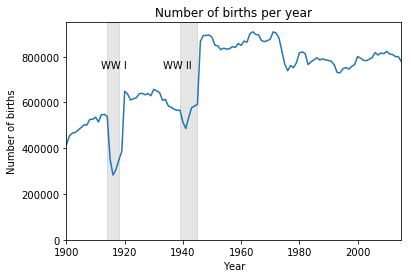

In [13]:
annual_births_series = df.groupby(['year'])['number'].sum()

for year in sorted({1913, 1916, 1945, 1947}):
    print('Number of births in ' + str(year) + ': ' + str(annual_births_series[year]))

annual_births_series.plot(kind='line', title = 'Number of births per year')
plt.xlim([1900,2015])
plt.ylim([0,950000])
plt.xlabel('Year')
plt.ylabel('Number of births')
plt.axvspan(1914, 1918, alpha=0.2, color='grey')
plt.annotate('WW I', xy=(1912, 750000))
plt.axvspan(1939, 1945, alpha=0.2, color='grey')
plt.annotate('WW II', xy=(1933, 750000))
plt.show()

#### Calculating the ratio of names per births each year

In order to eliminate the effects of demography on the evolution of names, let's calculate for each year the ratio of the number of people with a given name to the total number of births that year.

In [15]:
# Convert annual_births from series to dataframe
annual_births = annual_births_series.to_frame(name='annual_births')

# Merge the 2 dataframe with a left join
df = df.join(annual_births, on = 'year', how = 'left')

# Calculate the ratio of names per annual births
df['ratio'] = df.number / df.annual_births

print(df.head(10))

     sex   name    year  number  annual_births     ratio
0  False      A  1980.0       3       816506.0  0.000004
1  False      A  1998.0       3       757799.0  0.000004
2  False      A     NaN      21            NaN       NaN
3  False  AADEL  1976.0       5       738866.0  0.000007
4  False  AADEL  1978.0       3       751882.0  0.000004
5  False  AADEL  1980.0       3       816506.0  0.000004
6  False  AADEL  1981.0       5       821036.0  0.000006
7  False  AADEL  1982.0       4       813245.0  0.000005
8  False  AADEL  1983.0       3       765488.0  0.000004
9  False  AADEL  1987.0       5       785655.0  0.000006


#### Number of different names between 1900 and 2015

In [16]:
print('Total number of different names between 1900 and 2015: {}'.format(df.name.nunique()))

Total number of different names between 1900 and 2015: 31047


### Create 3 separate dataframes

- df: Dataframe with 'regular' names
- df_rare: Dataframe with 'rare' names (_PRENOMS_RARES), that is less than 20 people between 1900-1945 and 1946-2015
- df_xxxx: Dataframe with 'unspecified' years (year == 'XXXX'), that is less than 3 people in a given year

#### Dataframe of names with 'unspecified' year only (df_xxxx)

In [17]:
# Create dataframe with 'unspecified' years only
df_xxxx = df[df.year.isnull()].copy()

# Delete the 'annual_births' and 'ratio' columns since they are empty (cannot calculate with unspecified year)
del df_xxxx['annual_births']
del df_xxxx['ratio']

print(df_xxxx.head())
print('Number of unique names (unspecified years): ' + str(df_xxxx.name.nunique()))
print('Number of people (unspecified years): {0} ({1}% of total births)'\
      .format((df_xxxx.number.sum()), round((df_xxxx.number.sum() / tot_pop), 2)))

      sex    name  year  number
2   False       A   NaN      21
10  False   AADEL   NaN      25
33  False   AADIL   NaN      31
36  False  AAKASH   NaN      18
88  False   AARON   NaN      41
Number of unique names (unspecified years): 30702
Number of people (unspecified years): 730550 (0.01% of total births)


There are 31,047 unique names in total between 1900 and 2015.

There are 30,702 names with unspecified ('XXXX' or NaN) year (that is less than 3 people in at least one year).

This means that there were only 345 names that were always 'common' (more than 3 people in a given year) during the entire 1900-2015 period.

All other names (30,702) were 'rare' or 'new' names at some point between 1900 and 2015.

In [18]:
# Delete missing values ('unknown' years) from the main dataframe
init_len = len(df.index)
df = df.dropna()
new_len = len(df.index)

print(df.head())
print('The main dataframe was reduced from {0} rows to {1} rows.'.format(init_len, new_len))

     sex   name    year  number  annual_births     ratio
0  False      A  1980.0       3       816506.0  0.000004
1  False      A  1998.0       3       757799.0  0.000004
3  False  AADEL  1976.0       5       738866.0  0.000007
4  False  AADEL  1978.0       3       751882.0  0.000004
5  False  AADEL  1980.0       3       816506.0  0.000004
The main dataframe was reduced from 589411 rows to 557015 rows.


In [19]:
# Now that there are no NaN values, convert 'years' and 'annual_births' columns in the main dataframe to integers
df.year = pd.to_numeric(df.year, errors = 'coerce', downcast = 'integer')
df.annual_births = pd.to_numeric(df.annual_births, errors = 'coerce', downcast = 'integer')
print(df.head())

     sex   name  year  number  annual_births     ratio
0  False      A  1980       3         816506  0.000004
1  False      A  1998       3         757799  0.000004
3  False  AADEL  1976       5         738866  0.000007
4  False  AADEL  1978       3         751882  0.000004
5  False  AADEL  1980       3         816506  0.000004


#### Dataframe of rare names ('_PRENOMS_RARES') only (df_rare)

In [20]:
# Create dataframe with 'rare' names only
df_rare = df[((df.name) == '_PRENOMS_RARES')].copy()
print(df_rare.head())

# There are 232 entries: 116 years (between 1900 and 2015) * 2 (male or female)
print('There are {} entries in the "rare names" dataframe.'.format(len(df_rare.index)))

          sex            name  year  number  annual_births     ratio
267562  False  _PRENOMS_RARES  1900    1254         415204  0.003020
267563  False  _PRENOMS_RARES  1901    1341         453641  0.002956
267564  False  _PRENOMS_RARES  1902    1329         465956  0.002852
267565  False  _PRENOMS_RARES  1903    1286         468994  0.002742
267566  False  _PRENOMS_RARES  1904    1427         479170  0.002978
There are 232 entries in the "rare names" dataframe.


In [21]:
# Delete 'rare' names from the main dataframe
init_len = len(df.index)
df = df[(df.name != '_PRENOMS_RARES')]
new_len = len(df.index)
print('The main dataframe was reduced from {0} rows to {1} rows.'.format(init_len, new_len))

The main dataframe was reduced from 557015 rows to 556783 rows.


## 1. Explore the most common names

### Create a function to subset the main dataframe

In [22]:
def subdf(sex = None, name = None, year = None):
    if name != None:
        name = name.upper()
        if sex != None:
            if year != None:
                subdf = df[(df.sex == sex) & (df.name == name) & (df.year == year)].copy()
            else:
                subdf = df[(df.sex == sex) & (df.name == name)].copy()
        else:
            if year != None:
                subdf = df[(df.name == name) & (df.year == year)].copy()
            else:
                subdf = df[(df.name == name)].copy()
    else:
        if sex != None:
            if year != None:
                subdf = df[(df.sex == sex) & (df.year == year)].copy()
            else:
                subdf = df[(df.sex == sex)].copy()
        else:
            if year != None:
                subdf = df[(df.year == year)].copy()
            else:
                subdf = df.copy()
    return subdf

### Most common names in 2015

In [23]:
df2015 = subdf(year = 2015)
df2015M = subdf(year = 2015, sex = 0)
df2015F = subdf(year = 2015, sex = 1)
df_rare2015 = df_rare[(df_rare.year) == 2015]

births2015 = df2015.number.sum() + df_rare2015.number.sum()
unique2015 = df2015.name.nunique()
male2015 = df2015M.name.nunique()
female2015 = df2015F.name.nunique()
unisex2015 = len(df2015.index) - df2015.name.nunique()
rare2015 = df_rare2015.number.sum()
rare_ratio2015 = rare2015 / births2015

print(df2015.head())

print('\nThere were about {0} people born in 2015 in France.\
       \nIn total, there were {1} different names, including {2} male names and {3} female names.\
       \nThere were {4} names given to both males and females.\
       \nThere were {5} people with a rare name ({6}% of total births in 2015).'
      .format(int(births2015),\
              int(unique2015),\
              int(male2015),\
              int(female2015),\
              int(unisex2015),\
              int(rare2015),\
              round(rare_ratio2015, 2)))

       sex    name  year  number  annual_births     ratio
32   False   AADIL  2015       6         778691  0.000008
87   False   AARON  2015    2159         778691  0.002773
101  False  AARONE  2015       8         778691  0.000010
111  False  AARONN  2015       8         778691  0.000010
116  False  AAROUN  2015       4         778691  0.000005

There were about 778691 people born in 2015 in France.       
In total, there were 12354 different names, including 5947 male names and 6782 female names.       
There were 375 names given to both males and females.       
There were 56107 people with a rare name (0.07% of total births in 2015).


#### Male names in 2015

In [24]:
# Sort the 2015 male names dataframe and show the 15 most common male names in 2015
df2015M = df2015M.sort_values(by='number', ascending=False)
print(df2015M.head(15))

print('There were ' + str(df2015M.name.nunique()) + ' different male names given in 2015 in France.')

          sex     name  year  number  annual_births     ratio
86800   False  GABRIEL  2015    5640         778691  0.007243
136284  False    JULES  2015    5147         778691  0.006610
156532  False    LUCAS  2015    5011         778691  0.006435
154454  False    LOUIS  2015    4748         778691  0.006097
6418    False     ADAM  2015    4526         778691  0.005812
107522  False     HUGO  2015    4349         778691  0.005585
159457  False      LÉO  2015    4303         778691  0.005526
208769  False  RAPHAËL  2015    4196         778691  0.005389
74146   False    ETHAN  2015    4135         778691  0.005310
186813  False   NATHAN  2015    3871         778691  0.004971
26050   False   ARTHUR  2015    3688         778691  0.004736
199027  False     PAUL  2015    3654         778691  0.004692
190963  False    NOLAN  2015    3513         778691  0.004511
150954  False     LIAM  2015    3466         778691  0.004451
71561   False     ENZO  2015    3100         778691  0.003981
There we

#### 'Old' male names becoming popular again (Top 15 in 2015)

In [25]:
# Create a function to plot the evolution of a given name over time
def plotname(name, sex):
    dfNAME = df[((df.name) == name) & ((df.sex) == sex)]
    plt.plot(dfNAME.year, dfNAME.number, label = name)

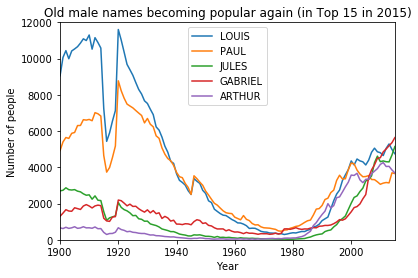

In [26]:
for name in ('LOUIS', 'PAUL', 'JULES', 'GABRIEL', 'ARTHUR'):
    plotname(name, 0)

plt.xlim([1900,2015])
plt.ylim([0,12000])
plt.legend(loc='upper center')
plt.xlabel('Year')
plt.ylabel('Number of people')
plt.title('Old male names becoming popular again (in Top 15 in 2015)')
plt.show()

#### 'New' male names in Top 15 in 2015

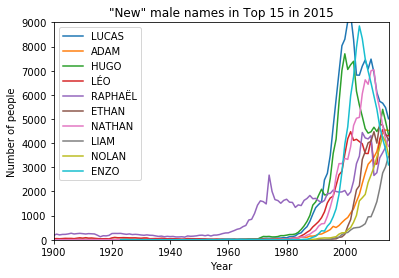

In [27]:
for name in ('LUCAS', 'ADAM', 'HUGO', 'LÉO', 'RAPHAËL', 'ETHAN', 'NATHAN', 'LIAM', 'NOLAN', 'ENZO'):
    plotname(name, 0)

plt.xlim([1900,2015])
plt.ylim([0,9000])
plt.legend(loc='upper left')
plt.xlabel('Year')
plt.ylabel('Number of people')
plt.title('"New" male names in Top 15 in 2015')
plt.show()

#### Female names in 2015

In [28]:
# Sort the 2015 female names dataframe and show the 15 most common female names in 2015
df2015F = df2015F.sort_values(by='number', ascending=False)
print(df2015F.head(15))

print('There were ' + str(df2015F.name.nunique()) + ' different female names given in 2015 in France.')

         sex     name  year  number  annual_births     ratio
442241  True   LOUISE  2015    4540         778691  0.005830
354188  True     EMMA  2015    4399         778691  0.005649
400974  True     JADE  2015    4292         778691  0.005512
323634  True    CHLOÉ  2015    3598         778691  0.004621
458372  True    MANON  2015    3530         778691  0.004533
276692  True    ALICE  2015    3336         778691  0.004284
435420  True     LINA  2015    3191         778691  0.004098
448550  True      LÉA  2015    3100         778691  0.003981
439018  True     LOLA  2015    3061         778691  0.003931
313888  True  CAMILLE  2015    3020         778691  0.003878
396932  True     INÈS  2015    2673         778691  0.003433
543412  True    SARAH  2015    2533         778691  0.003253
288792  True     ANNA  2015    2504         778691  0.003216
588196  True      ZOÉ  2015    2461         778691  0.003160
444251  True    LUCIE  2015    2454         778691  0.003151
There were 6782 differen

#### 'Old' female names becoming popular again (Top 15 in 2015)

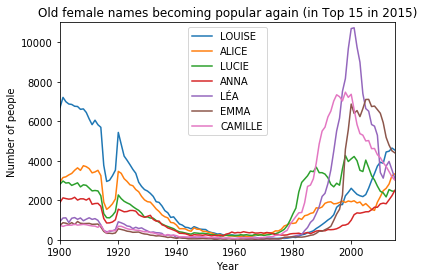

In [29]:
for name in ('LOUISE', 'ALICE', 'LUCIE', 'ANNA', 'LÉA', 'EMMA', 'CAMILLE'):
    plotname(name, 1)

plt.xlim([1900,2015])
plt.ylim([0,11000])
plt.legend(loc='upper center')
plt.xlabel('Year')
plt.ylabel('Number of people')
plt.title('Old female names becoming popular again (in Top 15 in 2015)')
plt.show()

#### 'New' female names in Top 15 in 2015

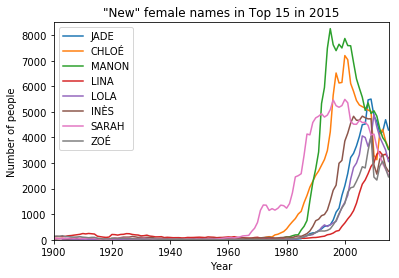

In [30]:
for name in ('JADE', 'CHLOÉ', 'MANON', 'LINA', 'LOLA', 'INÈS', 'SARAH', 'ZOÉ'):
    plotname(name, 1)

plt.xlim([1900,2015])
plt.ylim([0,8500])
plt.legend(loc='upper left')
plt.xlabel('Year')
plt.ylabel('Number of people')
plt.title('"New" female names in Top 15 in 2015')
plt.show()

#### Very recent new names most likely based on books / movies

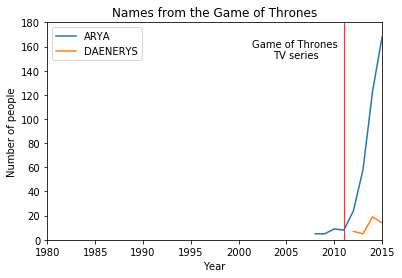

In [31]:
# A Game of Thrones 
plotname('ARYA', 1)
plotname('DAENERYS', 1)
plt.xlim([1980, 2015])
plt.ylim([0,180])
plt.legend(loc='upper left')
plt.xlabel('Year')
plt.ylabel('Number of people')
plt.axvspan(2011, 2011, alpha=0.8, color='red')
plt.annotate('Game of Thrones \nTV series', xy=(2006, 150), ha = "center")
plt.title('Names from the Game of Thrones')
plt.show()

'A Game of Thrones', the first novel in 'A Song of Ice and Fire' series, was first published in 1996.

However, the story became most popular with the 'Game of Thrones' TV series, which premiered in 2011.

Even though there were a couple of Aryas prior to 2011, the uptake in 'Arya' and 'Daenerys' in France seems to correlate with the 'Game of Thrones' TV series.

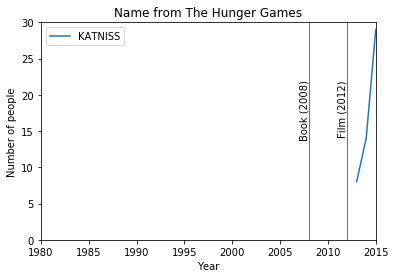

In [32]:
# Hunger Games 
plotname('KATNISS', 1)
plt.xlim([1980, 2015])
plt.ylim([0,30])
plt.legend(loc='upper left')
plt.xlabel('Year')
plt.ylabel('Number of people')
plt.axvspan(2008, 2008, alpha=0.8, color='red')
plt.annotate('Book (2008)', xy=(2007, 21), rotation = 90)
plt.axvspan(2012, 2012, alpha=0.8, color='red')
plt.annotate('Film (2012)', xy=(2011, 21), rotation = 90)
plt.title('Name from The Hunger Games')
plt.show()

The Hunger Games trilogy was published in 2008, 2009 and 2010.

The Hunger Games TV series premiered in 2012.

The name 'Katniss' first appeared in France in 2013, which seems to correlate with the Hunger Games TV series.

However, the effect of both 'A Game of Thrones' and 'The Hunger Games' does not seem that important (maximum 168 female Aryas in 2015). 

In general, the impact of movies, actors, songs, etc. might be overestimated. Cf. Philippe Besnard's research.

A more thorough analysis, for example using IMDb database for movies / characters / actors, could be interesting.

### Most common given names overall between 1900 and 2015

In [33]:
# Calculate number of people per name
total_name = {}
for i in range(len(df.index)):
    if df.iloc[i]['name'] in total_name:
        total_name[df.iloc[i]['name']] += df.iloc[i]['number']
    else:
        total_name[df.iloc[i]['name']] = df.iloc[i]['number']
        
# Create a dataframe from the dictionnary
total = pd.DataFrame.from_dict(total_name, orient='index')
total = total.rename(columns = {0:'number'})

# Sort rows by increasing years
total = total.sort_values(by='number', ascending = 0)

print(total.head(10))

           number
MARIE     2261897
JEAN      1920336
PIERRE     890202
MICHEL     820221
ANDRÉ      712386
JEANNE     550423
PHILIPPE   538393
RENÉ       516882
ALAIN      506763
LOUIS      504555


There is a bias toward "old" names because there were more people with a given name in the past (less diversity in names).

See Section 3: Evolution of the number of names.

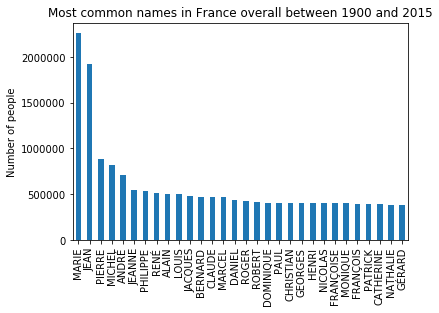

In [34]:
total.head(30).plot(kind='bar', title = 'Most common names in France overall between 1900 and 2015', legend = None)
plt.ylabel("Number of people")
plt.show()

#### Let's look at the 3 most common names: Marie, Jean et Pierre

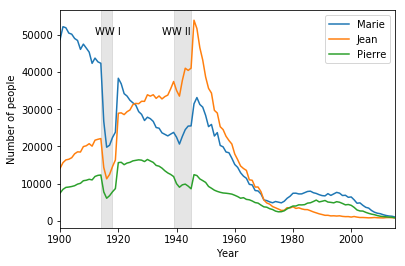

We can see a huge dip during WWI and a peak during the baby boom after WWII


In [35]:
dfMARIE = df[((df.name) == 'MARIE') & ((df.sex) == 1)]
dfJEAN = df[((df.name) == 'JEAN') & ((df.sex) == 0)]
dfPIERRE = df[((df.name) == 'PIERRE') & ((df.sex) == 0)]

plt.plot(dfMARIE.year, dfMARIE.number, label = 'Marie')
plt.plot(dfJEAN.year, dfJEAN.number, label = 'Jean')
plt.plot(dfPIERRE.year, dfPIERRE.number, label = 'Pierre')
plt.xlim([1900,2015])
plt.legend(loc='upper right')
plt.xlabel('Year')
plt.ylabel('Number of people')
plt.axvspan(1914, 1918, alpha=0.2, color='grey')
plt.annotate('WW I', xy=(1912, 50000))
plt.axvspan(1939, 1945, alpha=0.2, color='grey')
plt.annotate('WW II', xy=(1935, 50000))
plt.show()

print('We can see a huge dip during WWI and a peak during the baby boom after WWII')

#### Let's look at some of the shortest and longest names

In [36]:
# Longest name (only gives one of the two longest name)
total['name'] = total.index
max_length = 0
for name in set(total.name):
    if len(name) > max_length:
        max_length = len(name)
        longest_name = name
        
print('The longest name given in France between 1900 and 2015 is '+ longest_name 
      + ' which has ' + str(max_length) + ' characters.')

The longest name given in France between 1900 and 2015 is FRANÇOIS-CHRISTOPHE which has 19 characters.


In [37]:
# Alternatively, we can add a column giving the length of each name
for name in set(total.name):
    total.loc[name,'length'] = len(name) 

total = total.sort_values(by = 'length', ascending = 0)

In [38]:
# Let's look at the 10 longest names
print(total[['number', 'length']].head(10))

                     number  length
GUILLAUME-ALEXANDRE      57    19.0
FRANÇOIS-CHRISTOPHE       6    19.0
PHILIPPE-ALEXANDRE       69    18.0
FRANÇOIS-GUILLAUME       97    18.0
FRANÇOIS-DOMINIQUE        6    18.0
FRANÇOIS-ALEXANDRE       58    18.0
PIERRE-CHRISTOPHE        58    17.0
PHILIPPE-EMMANUEL        26    17.0
CLAUDE-EMMANUELLE         3    17.0
MARIE-ALEXANDRINE        42    17.0


In [39]:
# Let's look at the 10 shortest names
print(total[['number', 'length']].tail(10))

    number  length
AH      16     2.0
BY      13     2.0
DE       5     2.0
VI       9     2.0
TO       3     2.0
YA      22     2.0
A        6     1.0
L        6     1.0
N       52     1.0
M      155     1.0


#### Let's look at the name 'M'

The name 'M' was first given in the early 1960s.

This seems to correlate with the first James Bond movie (Dr. No, 1962), where M is the Head of the Secret Intelligence Service and Bond's superior.

It is hard to see correlations with specific movies since there were so many of them, so regularly.

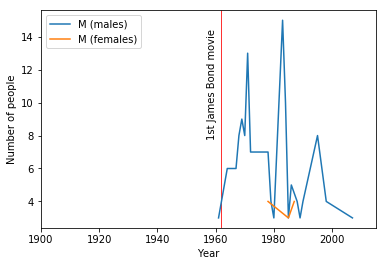

In [40]:
dfM_M = df[((df.name) == 'M') & (df.sex == 0)]
dfM_F = df[((df.name) == 'M') & (df.sex == 1)]
plt.plot(dfM_M.year, dfM_M.number, label = 'M (males)')
plt.plot(dfM_F.year, dfM_F.number, label = 'M (females)')
plt.xlim([1900,2015])
plt.xlabel('Year')
plt.ylabel('Number of people')
plt.legend(loc = 'upper left')
plt.axvspan(1962, 1962, alpha=0.8, color='red')
plt.annotate('1st James Bond movie', xy=(1957, 14), rotation = 90)
plt.show()

## 2. See the evolution of some specific names throughout the years

### My first name: Kim!

In [41]:
dfKIM = df[(df.name) == 'KIM']
print('There have been ' + str(sum(dfKIM.number)) + ' people named Kim in France between 1900 and 2015.')

dfKIM_M = df[((df.name) == 'KIM') & ((df.sex) == False)]
print('including ' + str(sum(dfKIM_M.number)) + ' males')

dfKIM_F = df[((df.name) == 'KIM') & ((df.sex) == True)]
print('and ' + str(sum(dfKIM_F.number)) + ' females.')

There have been 5912 people named Kim in France between 1900 and 2015.
including 1153 males
and 4759 females.


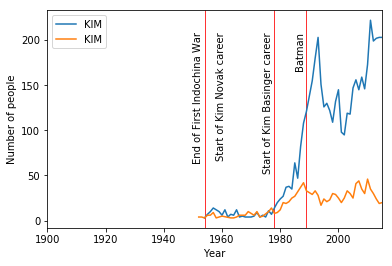

In [42]:
plotname('KIM', 1)
plotname('KIM', 0)
plt.xlim(1900,2015)
plt.legend(loc='upper left')
plt.xlabel('Year')
plt.ylabel('Number of people')
plt.axvspan(1954, 1954, alpha=0.8, color='red')
plt.annotate('End of First Indochina War', xy=(1950, 200), rotation = 90)
plt.annotate('Start of Kim Novak career', xy=(1958, 200), rotation = 90)
plt.axvspan(1978, 1978, alpha=0.8, color='red')
plt.annotate('Start of Kim Basinger career', xy=(1974, 200), rotation = 90)
plt.axvspan(1989, 1989, alpha=0.8, color='red')
plt.annotate("Batman", xy=(1985, 200), rotation = 90)
plt.show()

There were almost no Kim at all in France before 1952 (males) and 1954 (females).

The number of Kim increases around 1978, and reaches a local maximum in 1993.

There are probably correlations with:
- Immigration from Vietnam following the First Indochina War (1946-1954). Kim is a Sino-Vietnamese name (金) meaning gold (metal).
- The American actress, Kim Novak, began her career in 1954.
- The American actress, Kim Basinger, starting her acting career around 1978, and gained mainstream exposure in 1989 (Batman).

#### In 1986, the year I was born:

In [43]:
dfKIM_F86 = dfKIM_F[(dfKIM_F.year) == 1986]
print('There were ' + str(sum(dfKIM_F86.number)) + ' females named Kim in France in 1986')

dfKIM_M86 = dfKIM_M[(dfKIM_M.year) == 1986]
print('There were ' + str(sum(dfKIM_M86.number)) + ' males named Kim in France in 1986')

There were 47 females named Kim in France in 1986
There were 32 males named Kim in France in 1986


In [44]:
df1986 = df[(df.year) == 1986]

print(str(sum(df1986.number)) + ' people were born in 1986 in France.')

print('Only ' + str(round((sum(dfKIM_F86.number) + sum(dfKIM_M86.number)) / sum(df1986.number)*100, 2)) + 
      '% of them were named Kim!')

779050 people were born in 1986 in France.
Only 0.01% of them were named Kim!


### Creating a function to get statistics and graphs on a given first name and birth year

In [45]:
def name_stats(name, year):
    name = name.upper()
    
    # General statistics on the name between 1900 and 2015
    print('Number of ' + str(name).title() + ' in France between 1900 and 2015:')
    dfNAME = df[(df.name) == name]
    print('Total: ' + str(sum(dfNAME.number)))
    dfNAME_M = df[((df.name) == name) & ((df.sex) == 0)]
    print('Male ' + str(sum(dfNAME_M.number)))
    dfNAME_F = df[((df.name) == name) & ((df.sex) == 1)]
    print('Female ' + str(sum(dfNAME_F.number)))
    
    # Statistics on the name in given year
    print('Number of ' + str(name).title() + ' in France in ' + str(year) + ':')
    dfNAME_yr = df[((df.name) == name) & ((df.year) == year)]
    print('Total: ' + str(sum(dfNAME_yr.number)))
    dfNAME_Myr = df[((df.name) == name) & ((df.sex) == 0) & ((df.year) == year)]
    print('Males: ' + str(sum(dfNAME_Myr.number)))
    dfNAME_Fyr = df[((df.name) == name) & ((df.sex) == 1) & ((df.year) == year)]
    print('Females: ' + str(sum(dfNAME_Fyr.number)))
        
    # Graph 1 (number of people)
    plt.plot(dfNAME_M.year, dfNAME_M.number, label = str(name) + ' (male)')
    plt.xlim([1900,2015])
    plt.legend(loc='upper left')
    plt.xlabel('Year')
    plt.ylabel('Number of people')
    plt.plot(dfNAME_F.year, dfNAME_F.number, label = str(name) + ' (female)')
    plt.xlim([1900,2015])
    plt.legend(loc='upper left')
    plt.xlabel('Year')
    plt.ylabel('Number of people')
    plt.show()
    
    # Graph 2 (% of population)
    plt.plot(dfNAME_M.year, dfNAME_M.ratio, label = str(name) + ' (male)')
    plt.xlim([1900,2015])
    plt.legend(loc='upper left')
    plt.xlabel('Year')
    plt.ylabel('# people / # births')
    plt.plot(dfNAME_F.year, dfNAME_F.ratio, label = str(name) + ' (female)')
    plt.xlim([1900,2015])
    plt.legend(loc='upper left')
    plt.xlabel('Year')
    plt.ylabel('# people / # births')
    plt.show()
    
    # Most common names in given year
    df_yrM = df[((df.year) == year) & ((df.sex) == 0)]
    df_yrF = df[((df.year) == year) & ((df.sex) == 1)]
    df_yrM = df_yrM.sort_values(by='number', ascending=False)
    df_yrF = df_yrF.sort_values(by='number', ascending=False)
    print('Top 5 male names in ' + str(year))
    print(df_yrM[['name', 'number']].head(5))
    print('Top 5 female names in ' + str(year))
    print(df_yrF[['name', 'number']].head(5))
    
    # Rank
    df_yrM['rank'] = df_yrM['number'].rank(ascending=0)
    male_rank = df_yrM.loc[df_yrM['name'] == name]['rank'].values
    if male_rank.size != 0:
        print('In ' + str(year) + ', '+ str(name) + ' was the ' + str(int(male_rank[0])) + 'th most popular male name.')
  
    df_yrF['rank'] = df_yrF['number'].rank(ascending=0)
    female_rank = df_yrF.loc[df_yrF['name'] == name]['rank'].values
    if female_rank.size != 0:
        print('In ' + str(year) + ', '+ str(name) + ' was the ' + str(int(female_rank[0])) + 'th most popular female name.')  

#### Testing the function

Number of Marie in France between 1900 and 2015:
Total: 2261897
Male 26991
Female 2234906
Number of Marie in France in 1900:
Total: 49792
Males: 1065
Females: 48727


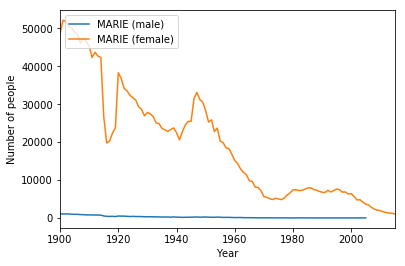

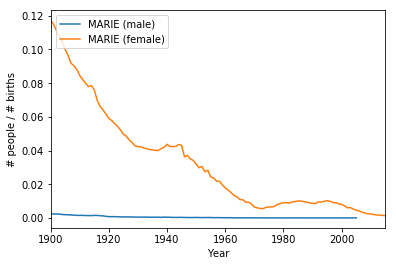

Top 5 male names in 1900
          name  number
119020    JEAN   14108
154339   LOUIS    9057
201834  PIERRE    7460
133536  JOSEPH    7263
103674   HENRI    6924
Top 5 female names in 1900
              name  number
462449       MARIE   48727
403785      JEANNE   13983
460374  MARGUERITE    8059
375279    GERMAINE    6981
442126      LOUISE    6698
In 1900, MARIE was the 37th most popular male name.
In 1900, MARIE was the 1th most popular female name.


In [46]:
name_stats('Marie', 1900)

Number of Christian in France between 1900 and 2015:
Total: 405251
Male 405165
Female 86
Number of Christian in France in 1951:
Total: 16682
Males: 16678
Females: 4


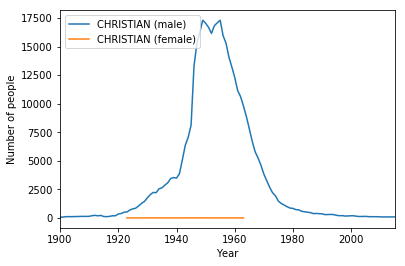

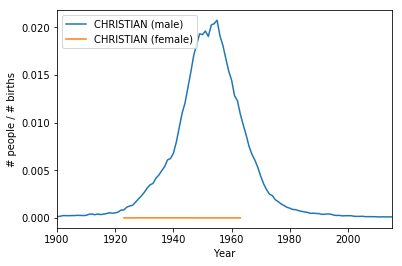

Top 5 male names in 1951
             name  number
119071       JEAN   35593
176647     MICHEL   25140
10555       ALAIN   23032
35580     BERNARD   16987
47097   CHRISTIAN   16678
Top 5 female names in 1951
             name  number
462500      MARIE   25312
478283    MARTINE   19008
371390  FRANÇOISE   13652
493626    MONIQUE   12798
507418     NICOLE   11537
In 1951, CHRISTIAN was the 5th most popular male name.
In 1951, CHRISTIAN was the 1238th most popular female name.


In [47]:
name_stats('Christian', 1951)

## 3. Evolution of the number of names

### Number of different names per year

The number of unique names per year has increased from less than 1,600 in 1900, to 6000+ in 1986 and 12,000+ in 2015.

Total number of different names between 1900 and 2015: 29459
Number of unique names in 1900: 1593
Number of unique names in 1986: 6390
Number of unique names in 2015: 12354


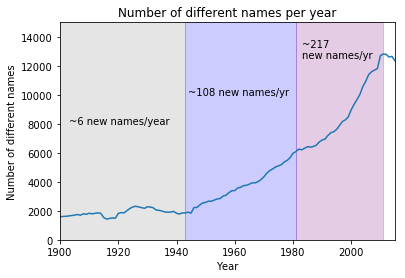

In [48]:
print('Total number of different names between 1900 and 2015: ' + str(df.name.nunique()))

annual_names = df.groupby(['year'])['name'].nunique()

for year in sorted({1900, 1986, 2015}):
    print('Number of unique names in ' + str(year) + ': ' + str(annual_names[year]))

annual_names.plot(kind='line', title = 'Number of different names per year')
plt.xlim([1900,2015])
plt.ylim([0,15000])
plt.xlabel('Year')
plt.ylabel('Number of different names')
plt.axvspan(1900, 1943, alpha=0.2, color='grey')
plt.annotate('~6 new names/year', xy=(1903, 8000))
plt.axvspan(1943, 1981, alpha=0.2, color='blue')
plt.annotate('~108 new names/yr', xy=(1944, 10000))
plt.axvspan(1981, 2011, alpha=0.2, color='purple')
plt.annotate('~217\nnew names/yr', xy=(1983, 12500))
plt.show()

### Ratio of different names per number of births

There is a sharp increase in the number of unique names compared to the increase in the number of births, starting around 1950.

There are so fewer births during the first World War that the ratio of names to births increases.

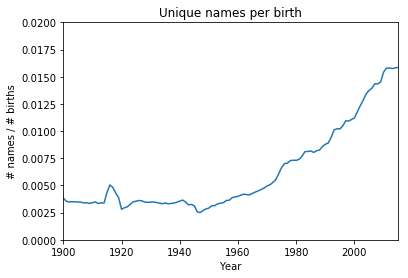

In [49]:
ratio = annual_names / annual_births_series

ratio.plot(kind='line', title = 'Unique names per birth')
plt.xlim([1900,2015])
plt.ylim([0,0.02])
plt.xlabel('Year')
plt.ylabel('# names / # births')
plt.show()

### Rare names

We can also notice how the number of people with rare names increased from 2,980 in 1900 (0.01% of births) to 56,107 in 2015 (0.07% of births).

Rare names are names with less than 20 people between 1900 and 1945 (condition 1), and less than 20 people between 1946 and 2015 (condition 2).

Rare names in 1900: 2980 people (0.01% of births)
Rare names in 2015: 56107 people (0.07% of births)


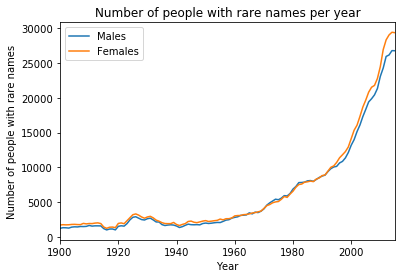

In [50]:
df_rare_M = df_rare[((df_rare.sex) == 0)]
df_rare_F = df_rare[((df_rare.sex) == 1)]

for year in sorted({1900, 2015}):
    nb = sum(df_rare[((df_rare.year) == year)].number)
    ratio = nb / (sum(df[((df.year) == year)].number) + sum(df_rare[((df_rare.year) == year)].number))
    print('Rare names in ' + str(year) + ': ' + 
          str(nb) + ' people ' +
          '(' + str(round(ratio, 2)) + '% of births' + ')')

plt.plot(df_rare_M.year, df_rare_M.number, label = 'Males')
plt.plot(df_rare_F.year, df_rare_F.number, label = 'Females')
plt.xlim([1900,2015])
plt.legend(loc='upper left')
plt.xlabel('Year')
plt.ylabel('Number of people with rare names')
plt.title('Number of people with rare names per year')
plt.show()

## 4. Name trends

### Trend of female names ending in '-iane'

In [51]:
# Identify female names with common ending -iane and at least 10,000 people in total
df_iane = df[(df.name.str.endswith('IANE')) & (df.sex == 1)]
df_iane_series = df_iane.groupby(['name'])['number'].sum()

print(df_iane_series[df_iane_series > 10000].sort_values(ascending = False))

name
CHRISTIANE    259535
JOSIANE       123110
ELIANE        113524
LILIANE       112028
SYLVIANE       53059
VIVIANE        52746
FLORIANE       19551
DIANE          18808
LAURIANE       13740
DORIANE        10473
LYSIANE        10093
Name: number, dtype: int32


#### In general, female names ending in '-iane' were most popular in 1930-1960

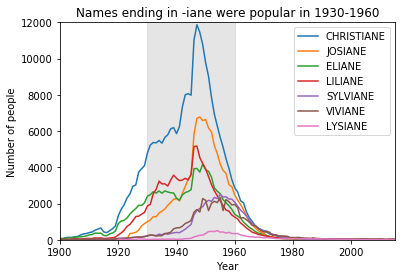

In [52]:
for name in ('CHRISTIANE', 'JOSIANE', 'ELIANE', 'LILIANE', 'SYLVIANE', 'VIVIANE', 'LYSIANE'):
    plotname(name, 1)

plt.xlim([1900, 2015])
plt.ylim([0,12000])
plt.legend(loc='upper right')
plt.xlabel('Year')
plt.ylabel('Number of people')
plt.axvspan(1930, 1960, alpha=0.2, color='grey')
plt.title('Names ending in -iane were popular in 1930-1960')
plt.show()

There are only a couple of exceptions of names ending in '-iane' with at least 10,000 people in total between 1900-2015, that were popular after the 1930-1960.

This phenomenon was on a much smaller scale, up to almost 12,000 people for 'Christiane' in 1947, versus about 1,000 people for 'Floriane' in 1991.

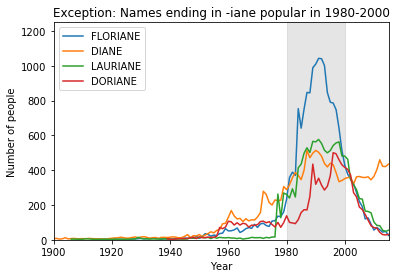

In [53]:
for name in ('FLORIANE', 'DIANE', 'LAURIANE', 'DORIANE'):
    plotname(name, 1)
    
plt.xlim([1900, 2015])
plt.ylim([0,1250])
plt.legend(loc='upper left')
plt.xlabel('Year')
plt.ylabel('Number of people')
plt.axvspan(1980, 2000, alpha=0.2, color='grey')
plt.title('Exception: Names ending in -iane popular in 1980-2000')
plt.show()

### Trend of female names ending in '-ette'

In [54]:
# Identify female names with common ending -ette and at least 10,000 people in total
df_iane = df[(df.name.str.endswith('ETTE')) & (df.sex == 1)]
df_iane_series = df_iane.groupby(['name'])['number'].sum()

print(df_iane_series[df_iane_series > 10000].sort_values(ascending = False))

name
PAULETTE      213443
YVETTE        203485
ODETTE        192623
COLETTE       174175
JULIETTE      156688
JOSETTE       154200
GEORGETTE     153061
BERNADETTE    141557
GINETTE       131670
HENRIETTE     126999
HUGUETTE       90185
PIERRETTE      81955
ARLETTE        78588
ANTOINETTE     72578
LUCETTE        69931
MAURICETTE     52842
CLAUDETTE      47747
ANNETTE        33488
VIOLETTE       22007
LOUISETTE      20109
JEANNETTE      19629
MARINETTE      17375
SYLVETTE       14852
MARIETTE       10744
Name: number, dtype: int32


#### In general, female names ending in '-ette' were most popular in 1920-1940

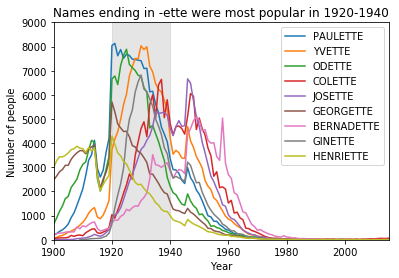

In [55]:
for name in ('PAULETTE', 'YVETTE', 'ODETTE', 'COLETTE', 'JOSETTE', 'GEORGETTE', 'BERNADETTE', 'GINETTE', 'HENRIETTE'):
    plotname(name, 1)

plt.xlim([1900, 2015])
plt.ylim([0,9000])
plt.legend(loc='upper right')
plt.xlabel('Year')
plt.ylabel('Number of people')
plt.axvspan(1920, 1940, alpha=0.2, color='grey')
plt.title('Names ending in -ette were most popular in 1920-1940')
plt.show()

A notable exception is 'Juliette'.

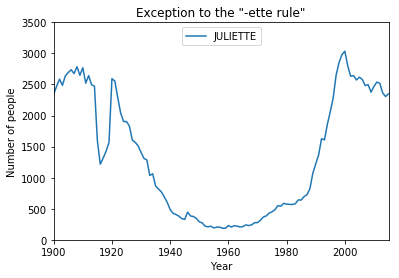

In [56]:
plotname('JULIETTE', 1)

plt.xlim([1900, 2015])
plt.ylim([0,3500])
plt.legend(loc='upper center')
plt.xlabel('Year')
plt.ylabel('Number of people')
plt.title('Exception to the "-ette rule"')
plt.show()

### Trend of female names ending in '-ine'

In [57]:
# Identify female names with common ending -ine and at least 100,000 people in total
df_ine = df[(df.name.str.endswith('INE')) & (df.sex == 1)]
df_ine_series = df_ine.groupby(['name'])['number'].sum()

print(df_ine_series[df_ine_series > 100000].sort_values(ascending = False))

name
CATHERINE     394633
JACQUELINE    372540
MARTINE       320183
MADELEINE     303756
CHRISTINE     280513
SANDRINE      240281
CÉLINE        237989
JEANNINE      218682
GERMAINE      211106
CLAUDINE      158987
CAROLINE      156019
PAULINE       154426
NADINE        131279
DELPHINE      127504
KARINE        121039
MARINE        118642
MICHELINE     111887
Name: number, dtype: int32


#### In general, female names ending in '-ine' were most popular between 1950 and 1980

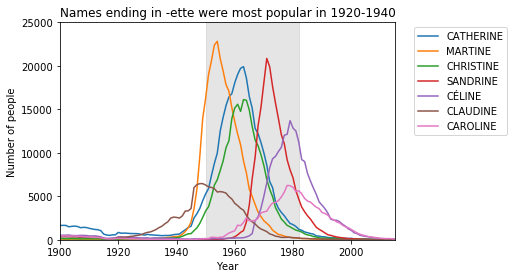

In [58]:
for name in ('CATHERINE',  'MARTINE', 'CHRISTINE', 'SANDRINE', 'CÉLINE', 'CLAUDINE', 'CAROLINE'):
    plotname(name, 1)

plt.xlim([1900, 2015])
plt.ylim([0,25000])
plt.legend(bbox_to_anchor=(1.35, 1), loc='upper right', ncol=1)
plt.xlabel('Year')
plt.ylabel('Number of people')
plt.axvspan(1950, 1982, alpha=0.2, color='grey')
plt.title('Names ending in -ette were most popular in 1920-1940')
plt.show()

### Trend of composed names

Cf. Philippe Besnard's research.

#### Female composed names were most popular in 1945-1965

In [59]:
# Identify female composed names with at least 10,000 people in total
df_composedF = df[(df.name.str.contains('-')) & (df.sex == 1)]
df_composedF_series = df_composedF.groupby(['name'])['number'].sum()

print(df_composedF_series[df_composedF_series > 10000].sort_values(ascending = False))

name
ANNE-MARIE         99695
MARIE-THÉRÈSE      88345
MARIE-CHRISTINE    74956
MARIE-CLAUDE       57167
MARIE-FRANCE       53601
MARIE-LOUISE       48508
MARIE-HÉLÈNE       37549
MARIE-CLAIRE       35685
MARIE-LAURE        35222
MARIE-JOSÉ         34651
ANNE-SOPHIE        32285
MARIE-PIERRE       31502
MARIE-FRANÇOISE    27809
MARIE-NOËLLE       21156
ANNE-LAURE         20356
MARIE-JEANNE       19486
MARIE-PAULE        18814
MARIE-ANGE         16612
MARIE-LINE         16170
MARIE-ROSE         12411
MARIE-MADELEINE    12276
MARIE-ANNE         11900
ROSE-MARIE         10627
MARIE-JOSEPHE      10318
MARIE-ODILE        10231
Name: number, dtype: int32


Most of the female composed names with at least 10,000 people in total since 1900 comprised the name 'MARIE'! (Marie is the most common female name overall in France between 1900 and 2015.)

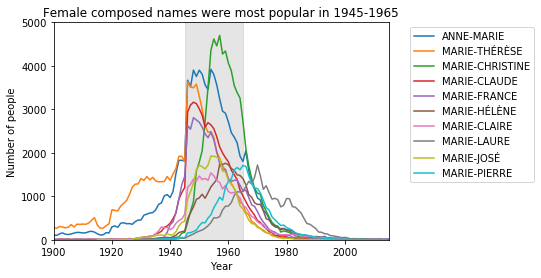

In [60]:
for name in ('ANNE-MARIE',  'MARIE-THÉRÈSE', 'MARIE-CHRISTINE', 'MARIE-CLAUDE', 'MARIE-FRANCE', 'MARIE-HÉLÈNE', 'MARIE-CLAIRE',\
             'MARIE-LAURE', 'MARIE-JOSÉ', 'MARIE-PIERRE'):
    plotname(name, 1)

plt.xlim([1900, 2015])
plt.ylim([0,5000])
plt.legend(bbox_to_anchor=(1.45, 1), loc='upper right', ncol=1)
plt.xlabel('Year')
plt.ylabel('Number of people')
plt.axvspan(1945, 1965, alpha=0.2, color='grey')
plt.title('Female composed names were most popular in 1945-1965')
plt.show()

#### In general, male composed names were also most popular in 1945-1965

In [61]:
# Identify male composed names with at least 10,000 people in total
df_composedM = df[(df.name.str.contains('-')) & (df.sex == 0)]
df_composedM_series = df_composedM.groupby(['name'])['number'].sum()

print(df_composedM_series[df_composedM_series > 10000].sort_values(ascending = False))

name
JEAN-PIERRE        213143
JEAN-CLAUDE        172142
JEAN-LUC           116647
JEAN-FRANÇOIS       99024
JEAN-MARC           90144
JEAN-PAUL           86843
JEAN-MARIE          86223
JEAN-MICHEL         85960
JEAN-LOUIS          79826
JEAN-JACQUES        53423
JEAN-BAPTISTE       48549
JEAN-PHILIPPE       45672
JEAN-YVES           37180
JEAN-CHRISTOPHE     31847
JEAN-CHARLES        19269
JEAN-NOËL           14776
Name: number, dtype: int32


All the male composed names with at least 10,000 people in total since 1900 comprised the name 'JEAN'! (Jean is the most common male name overall in France between 1900 and 2015.)

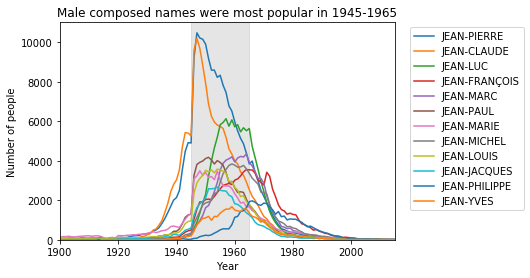

In [62]:
for name in ('JEAN-PIERRE',  'JEAN-CLAUDE', 'JEAN-LUC', 'JEAN-FRANÇOIS', 'JEAN-MARC', 'JEAN-PAUL', 'JEAN-MARIE',\
             'JEAN-MICHEL', 'JEAN-LOUIS', 'JEAN-JACQUES', 'JEAN-PHILIPPE', 'JEAN-YVES'):
    plotname(name, 0)

plt.xlim([1900, 2015])
plt.ylim([0,11000])
plt.legend(bbox_to_anchor=(1.40, 1), loc='upper right', ncol=1)
plt.xlabel('Year')
plt.ylabel('Number of people')
plt.axvspan(1945, 1965, alpha=0.2, color='grey')
plt.title('Male composed names were most popular in 1945-1965')
plt.show()

## 5. Evolution of the length of names

Inspired by INSEE analysis: 

'L'évolution des prénoms en région Centre : plus courts et plus variés que par le passé'

('The evolution of first names in the Centre region of France: shorter and more diverse than in the past'

https://www.insee.fr/fr/statistiques/1292923

In [ ]:
# Calculate length of names per year weighted by the number of births
names_length = {}
for i in range(len(df.index)):
    if df.iloc[i]['year'] in names_length:
        names_length[df.iloc[i]['year']] += len(str(df.iloc[i]['name'])) * df.iloc[i]['number']
    else:
        names_length[df.iloc[i]['year']] = len(str(df.iloc[i]['name'])) * df.iloc[i]['number']

# Create a dataframe from the dictionnary
length = pd.DataFrame.from_dict(names_length, orient='index')
length['year'] = length.index
length = length.rename(columns = {0:'length'})

# Sort rows by increasing years
length = length.sort_values(by='year')

# Reorder columns
length = length[['year', 'length']] 

# Add a column with number of births per year
length['births'] = df.groupby(['year'])['number'].sum()

# Add a column with mean length of names per year (mean weighted by number of births)
length['avg_length'] = length['length'] / length['births']

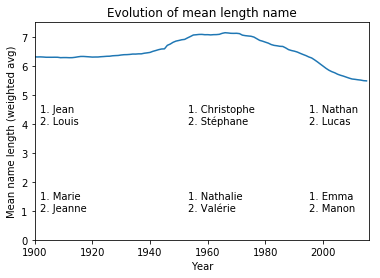

In [66]:
# Create graph
plt.plot(length.year, length.avg_length)
plt.xlabel('Year')
plt.ylabel('Mean name length (weighted avg)')
plt.xlim([1900,2016])
plt.ylim([0,7.5])
plt.annotate('1. Jean\n2. Louis', (1902,4))
plt.annotate('1. Marie\n2. Jeanne', (1902,1))
plt.annotate('1. Christophe\n2. Stéphane', (1953,4))
plt.annotate('1. Nathalie\n2. Valérie', (1953,1))
plt.annotate('1. Nathan\n2. Lucas', (1995,4))
plt.annotate('1. Emma\n2. Manon', (1995,1))
plt.title('Evolution of mean length name')
plt.show()

In [64]:
# Can see if it somewhat correlates with the top names in 1900, 1970 and 2010
def top_names(year):
    dfyrM = df[((df.year) == year) & ((df.sex) == 0)]
    dfyrM = dfyrM.sort_values(by = 'number', ascending = False)
    print(dfyrM.head(3))
    
    dfyrF = df[((df.year) == year) & ((df.sex) == 1)]
    dfyrF = dfyrF.sort_values(by = 'number', ascending = False)
    print(dfyrF.head(3))

top_names(1900)
top_names(1970)
top_names(2010)

          sex    name  year  number  annual_births     ratio
119020  False    JEAN  1900   14108         415204  0.033978
154339  False   LOUIS  1900    9057         415204  0.021813
201834  False  PIERRE  1900    7460         415204  0.017967
         sex        name  year  number  annual_births     ratio
462449  True       MARIE  1900   48727         415204  0.117357
403785  True      JEANNE  1900   13983         415204  0.033677
460374  True  MARGUERITE  1900    8059         415204  0.019410
          sex        name  year  number  annual_births     ratio
47397   False  CHRISTOPHE  1970   21856         876454  0.024937
235971  False    STÉPHANE  1970   21796         876454  0.024868
148072  False     LAURENT  1970   19957         876454  0.022770
         sex      name  year  number  annual_births     ratio
503215  True  NATHALIE  1970   26217         876454  0.029913
574404  True   VALÉRIE  1970   19390         876454  0.022123
542332  True  SANDRINE  1970   18056         876454  0